<a id="2"></a> <br>
# Google Data Analytics Capstone Project: Bellabeat Case Study | R 


<a id="2"></a> <br>
# Table of Contents
[Introduction section](#1)

[Ask](#2)

[Prepare](#3)

[Process](#4)

[Analyze](#5)

[Act](#6)

<a id="1"></a> <br>
# 1. Introduction

[Bellabeat](https://bellabeat.com/), a high-tech manufacturer of health-focused products for women with the potential to become a larger player in the global smart device market. 

Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.
By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. 

<a id="2"></a> <br>
# 2. Ask

Analyze the usage data in order to gain insight into how people are already using the smart devices. With the insights, share high-level recommendations for how these trends can inform Bellabeat marketing strategy.

1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy?

In [ ]:
# The packages installed
library(tidyverse)
library(ggpubr)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)
library(RColorBrewer)
library(gcookbook)
library(ggplot2)
library(dplyr)  
library(tidyr)
library(waffle)
library(scales)

<a id="3"></a> <br>
# 3. Prepare

**About the public dataset: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)
* contains personal fitness tracker from about 30 fitbit users, including minute-level output for daily physical activity, heart rate, and sleep monitoring that can be used to explore users’ habits in a course of a month.

Because the data is limited to a small user sample, it doesn't specific much about the user's demographics where there may be limitations of the findings

In [ ]:
#Import Data

activity <-read.csv("dailyActivity_merged.csv")
calories <-read.csv("hourlyCalories_merged.csv")
intensities <-read.csv("hourlyIntensities_merged.csv")
steps <-read.csv("hourlySteps_merged.csv")
sleep <-read.csv("sleepDay_merged.csv")
weight <-read.csv("weightLogInfo_merged.csv")

<a id="4"></a> <br>
# 4. Process

I'm going to use the datasets:
**activity, calories, intensities, steps, sleep, weight**

In [ ]:
#The valur of unique users for each data set

count(activity, Id)       #33
count(calories, Id)       #33
count(intensities, Id)    #33
count(sleep, Id)          #24
count(steps, Id)          #33
count(weight, Id)         #8

Total number of participants is 33 in activty, calories, intensities & steps, 
24 in sleep and 8 in weight.

8 isn't enough to make any recommenations, whereas I will drop the weight dataframe from going further.
24 is enough to continue

**Checking for duplicates**

In [ ]:
#Duplicates
sum(duplicated(activity))     #0
sum(duplicated(calories))     #0
sum(duplicated(intensities))  #0
sum(duplicated(sleep))        #3
sum(duplicated(steps))        #0
sum(duplicated(weight))       #0

Found 3 duplicates in sleep, where I'm going to removes the duplicates

In [ ]:
# Remove Duplicates
sleep <- sleep %>%
  distinct( ) %>%
  drop()

Checking to confirm the duplicate has been removed

In [ ]:
#Verification of data cleaning
sum(duplicated(sleep)) 
0

**Merging datasets and separating columns**

In [ ]:
#Merge 

activity_sleep <- merge(activity, sleep, by= c("Id","date_time"), all.x = TRUE)
 
#separate date + time into 2 separate columns
sleepmerge <- sleep %>%
  separate(date_time, c('date', 'time'), sep = ' ')  

sleep %>%
  separate(date_time, c('date', 'time'), sep = ' ')

activitymerge1 <- merge(activity, sleepmerge, by = c("Id", "date"), all.x = TRUE)

In [ ]:
# Rename columns

colnames(activity)[colnames(activity) == "Date"]  <- "date"
colnames(sleep)[colnames(sleep) == "SleepDay"]  <- "date_time"
colnames(calories)[colnames(calories) == "ActivityHour"]  <- "date_time"
colnames(activity)[colnames(activity) == "date_time"]  <- "date"

<a id="5"></a> <br>
# 5. Analyze

According to [MedicineNet](https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm), here are the daily steps classified:

* Sedentary: Less than 5,000 steps daily
* Low active: About 5,000 to 7,499 steps daily
* Somewhat active: About 7,500 to 9,999 steps daily
* Active: More than 10,000 steps daily


In [ ]:
averagemerge <- AverageDaily1 %>%
  mutate(usertype = case_when(averagesteps < 5000 ~ "sedentary",
                              averagesteps >= 5000 & averagesteps < 7499 ~ "lightly active",
                              averagesteps >= 7500 & averagesteps < 9999 ~ "fairly active",
                              averagesteps >= 10000 ~ "very active"))

userpercent <- averagemerge %>%
  group_by(usertype) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(usertype) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = percent(total_percent))

userpercent %>%
ggplot(aes(x="",y=total_percent, fill=usertype)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#FF83FA","#FFD700", "#FFA07A", "#7FFFD4")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  labs(title="User type distribution")

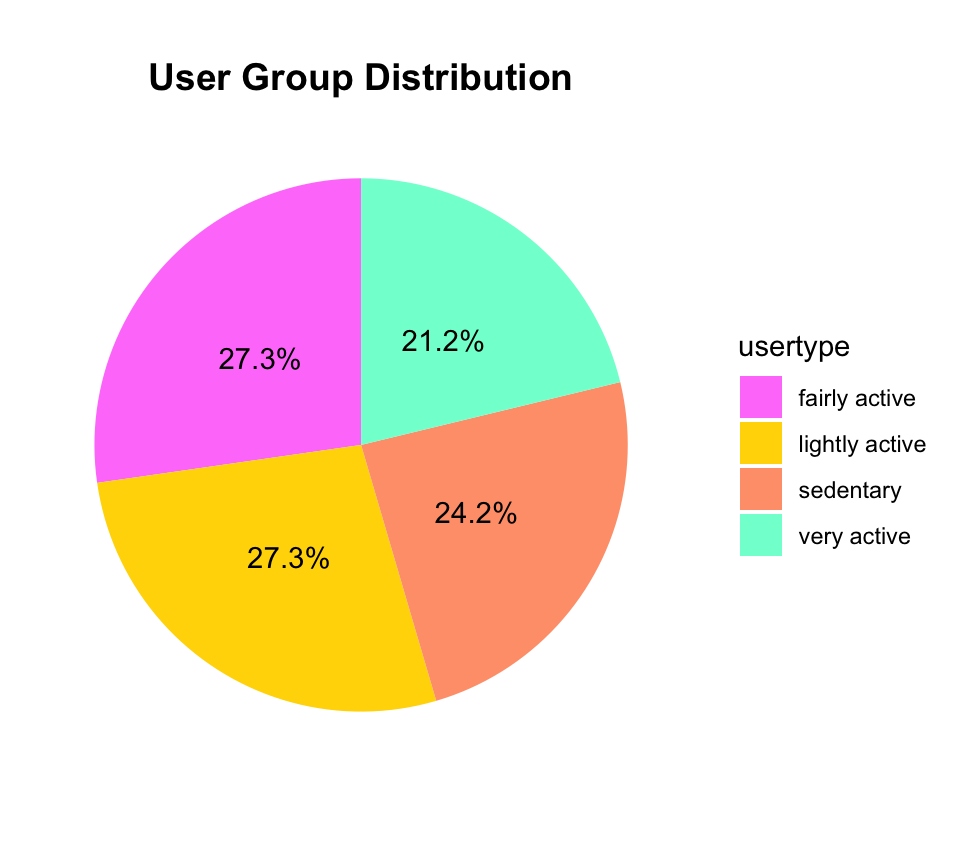

The majority of the group are fairly & lightly active, and the least are very active.

Here's the quantative breakdrown of each user group:
* Sedentary - 8
* Lightly Active - 9
* Fairly Active - 9
* Very Active - 7


In [ ]:
#Summary

#activity
  activity %>%  
    select(TotalSteps,
           TotalDistance,
            Calories) %>%
    summary()
  
  # explore number of active minutes per category
  activity %>%
    select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes,) %>%
    summary()
  
  # calories
  calories %>%
    select(Calories) %>%
    summary()

  
  # sleep
  sleep %>%
    select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
    summary()

In [ ]:
TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  


VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  


    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0

Sedentary Minutes has a greater amount of minutes compared to the other active minute types, indicating the users spend more time seated or inactive.

In [ ]:
  ggplot(data=activitymerge1, aes(x= TotalSteps, y=Calories)) + 
    geom_point(color='salmon1') + geom_smooth(size=1.5, color='mistyrose1') +
    labs(title="Total Steps vs. Calories")

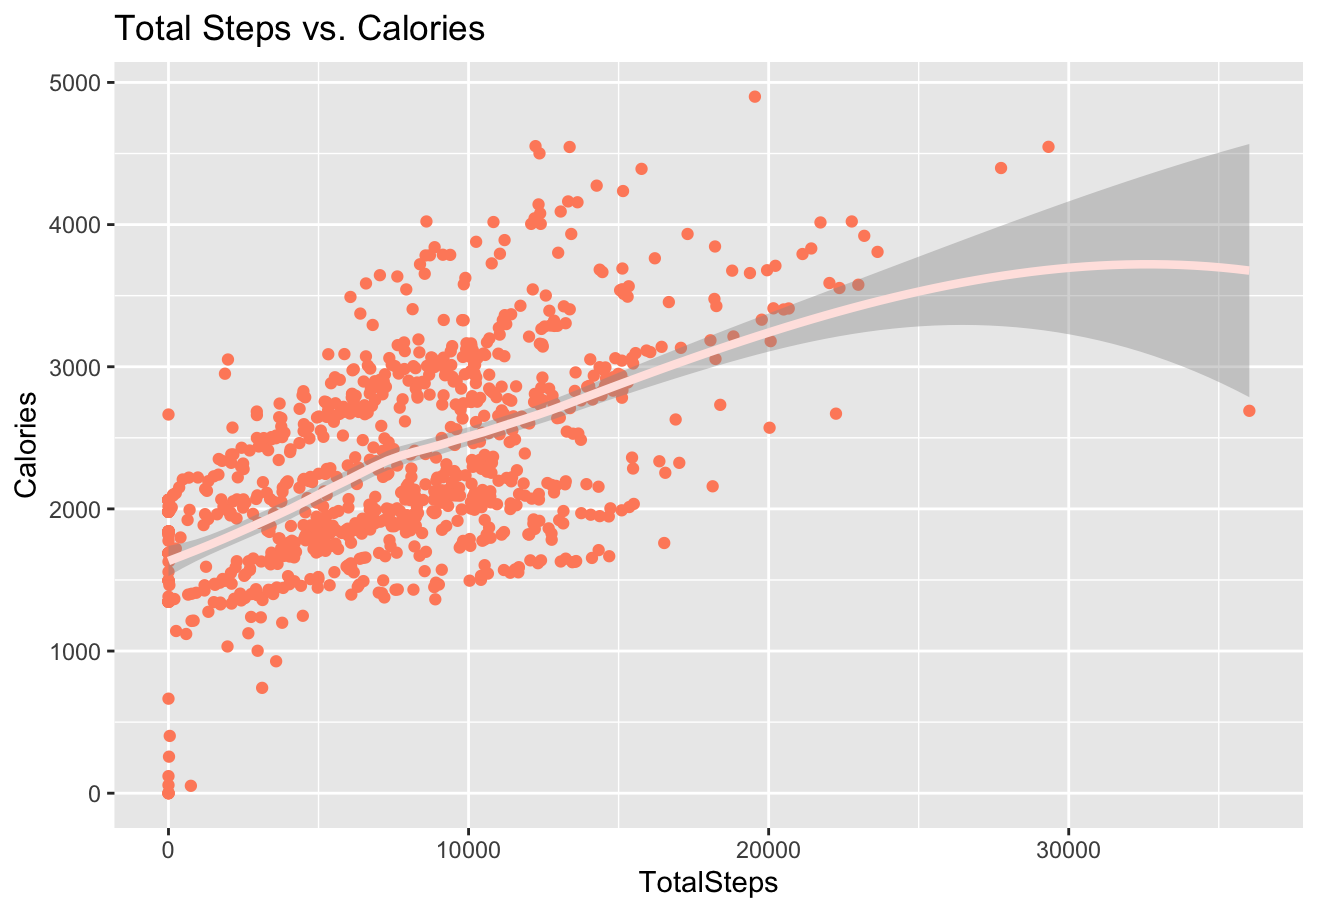

There's a positive correlation between Calories & Total Steps. The more steps we take, the more calories we burn.

In [ ]:
ggplot(data=activitymerge1, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
  geom_point(color='salmon1') + geom_smooth(size=2, color='mistyrose1') +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

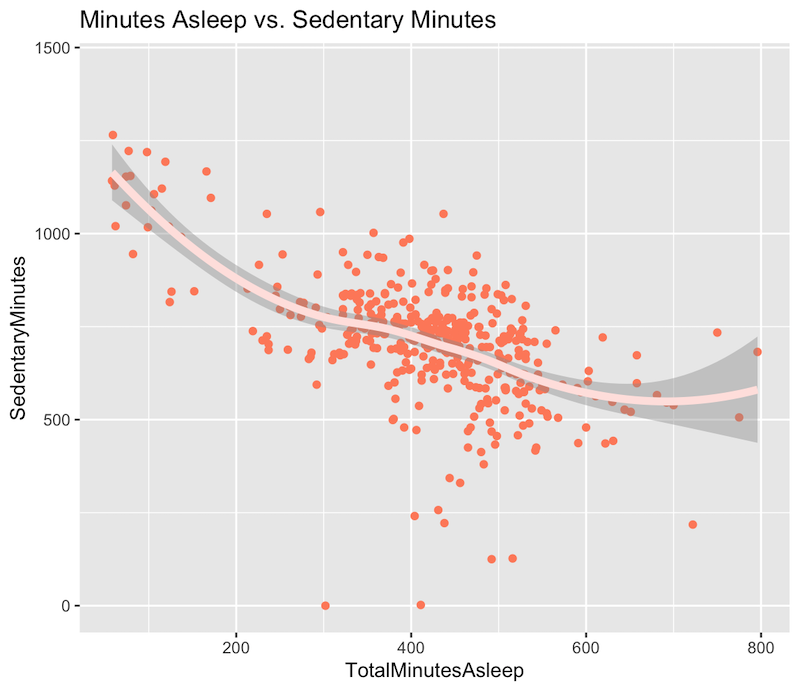

There's a negitive correlation between Sedentary Minutes & the Total Minutues Alseep.

**A suggestion: if users want to more balance sleep, then BellaBeat can help by reducing the sedentary minutes down that will help their qauilty sleep go up**

We would still need more data evidence to back up this claim since the data sample is small, whereas the relation between two variables may not always be the same cause in other data

In [ ]:
#Finding Averages

AverageDaily <- activitymerge1 %>%
  group_by(Id) %>%
  summarise(averagedailysteps = mean(activitymerge1$TotalSteps), avaeragedailycalories = mean(Calories), averagedailysleep =  mean(activitymerge1$TotalMinutesAsleep))

AverageSleep <- sleep %>%
group_by(sleep$Id) %>%
summarise (averagesleepmintues = mean(TotalMinutesAsleep), averagebedtime = mean(TotalTimeInBed))

#Converting time 12 hour AM/PM tp 24 hour

steps1 <- steps1 %>%
  mutate(newtime1 = strftime(strptime(steps1$newtime, format = "%I:%M:%S %p"), format = "%H:%M:%S"))

In [ ]:
steps2 <-steps1 %>%
  group_by(newtime1) %>%
  summarize(averagesteps = mean(StepTotal))
  
  
steps2 %>%
  ggplot() +
  geom_col(mapping = aes(x=newtime1, y = averagesteps, fill = averagesteps)) + 
  labs(title = "Hourly steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "green", high = "hotpink1")+
  theme(axis.text.x = element_text(angle = 90))
--

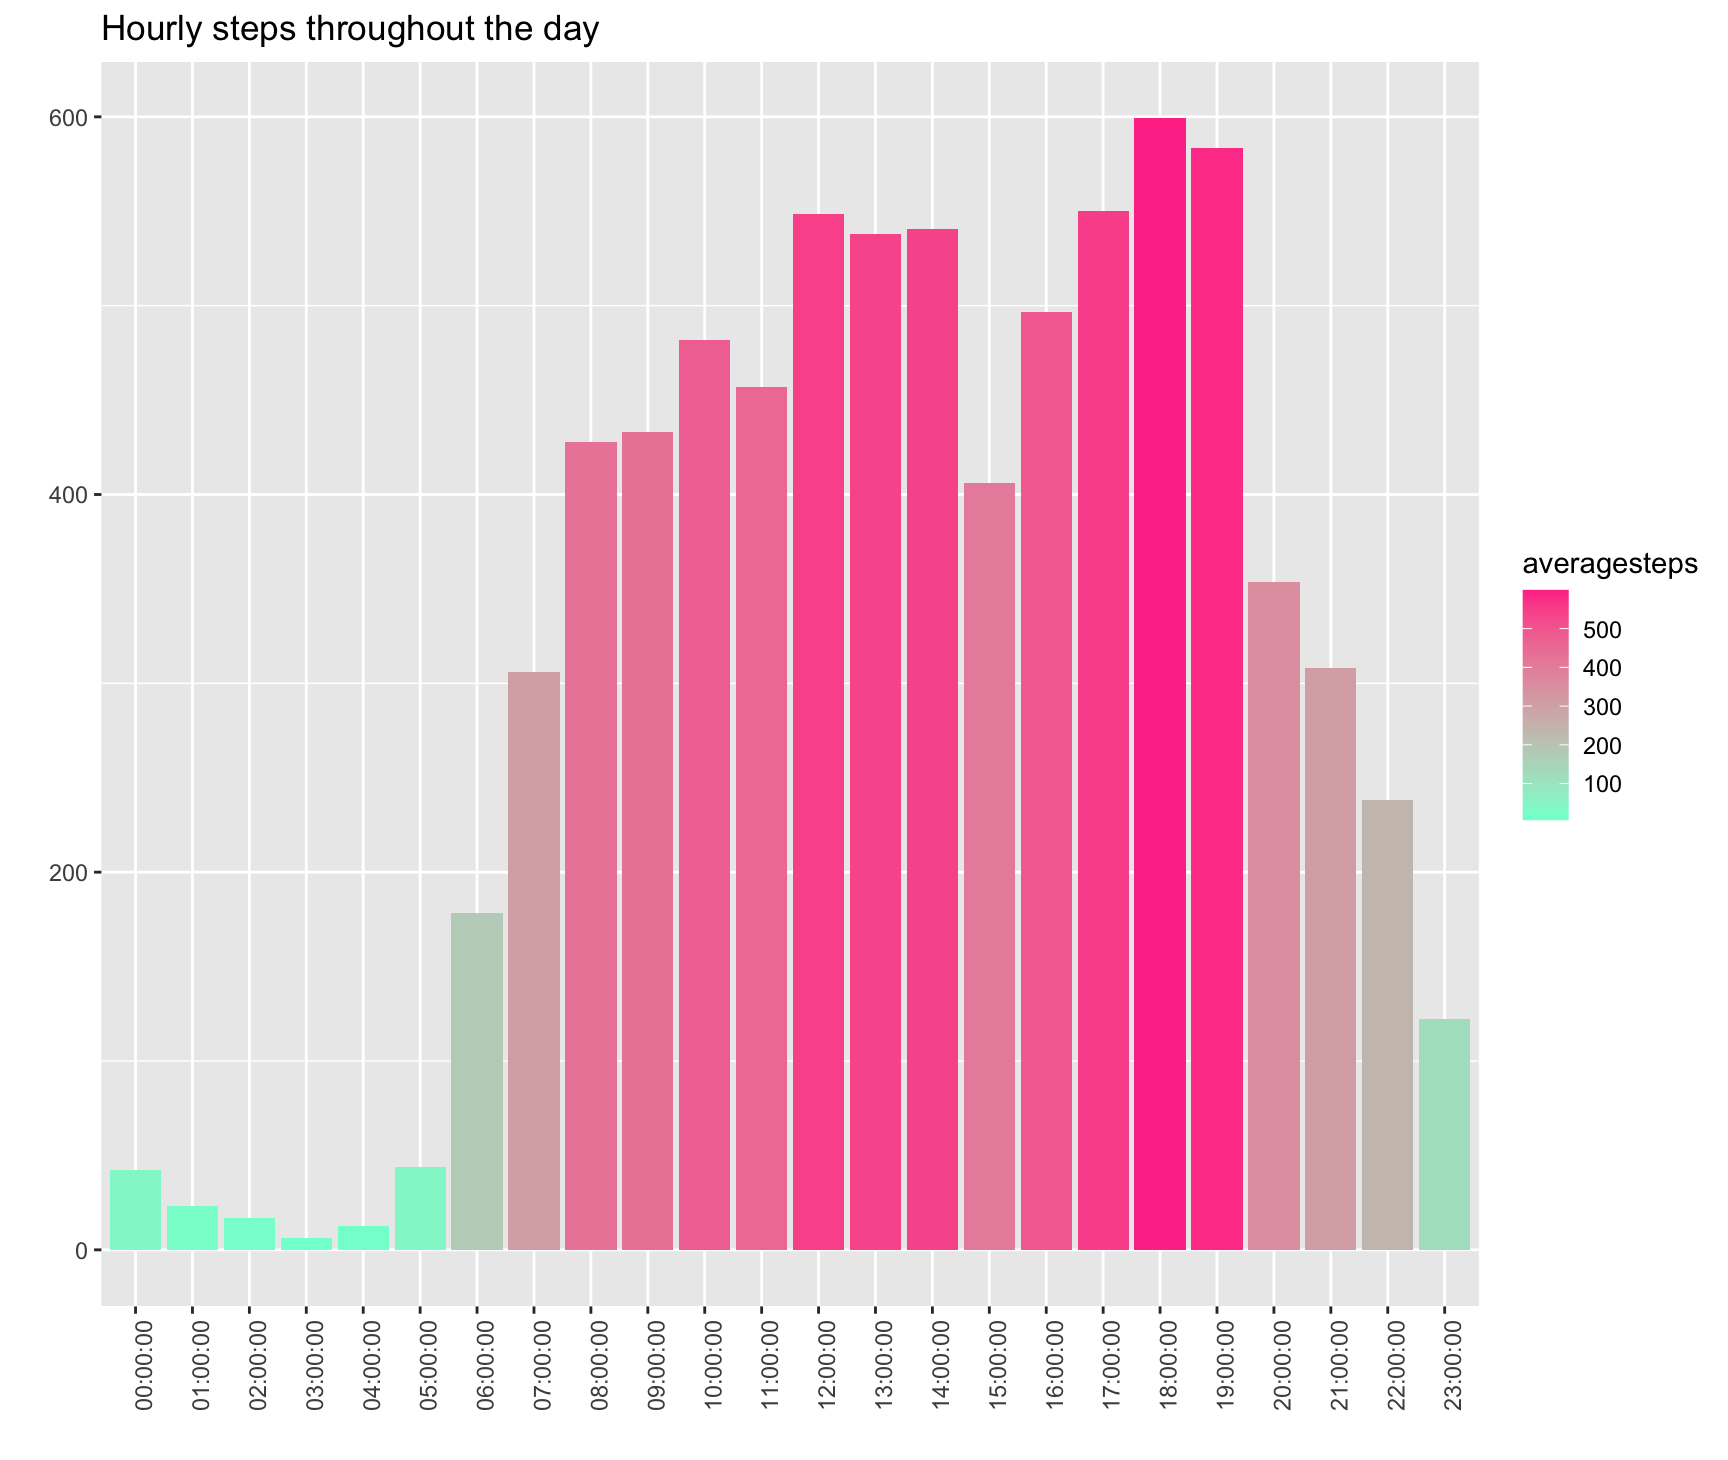

During 12:00PM-2:00PM & 5:00PM-7:00PM, users are most active where they are taking a break during lunchtime or afterwork. Activity is low from 11pm-6am, where it's bedtime.

In [ ]:
ggplot(steps2, aes(x= newtime1, y= weekday, 
                           fill= averagesteps)) +
  theme(axis.text.x= element_text(angle = 90))+
  labs(title= "Active Time During the Week", 
       x=" ", y=" ",fill = "average\nsteps",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_gradient(low= "white", high="violetred1")+
  geom_tile(color= "white",lwd =.6,linetype =1)+
  coord_fixed()+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        panel.background= element_blank())

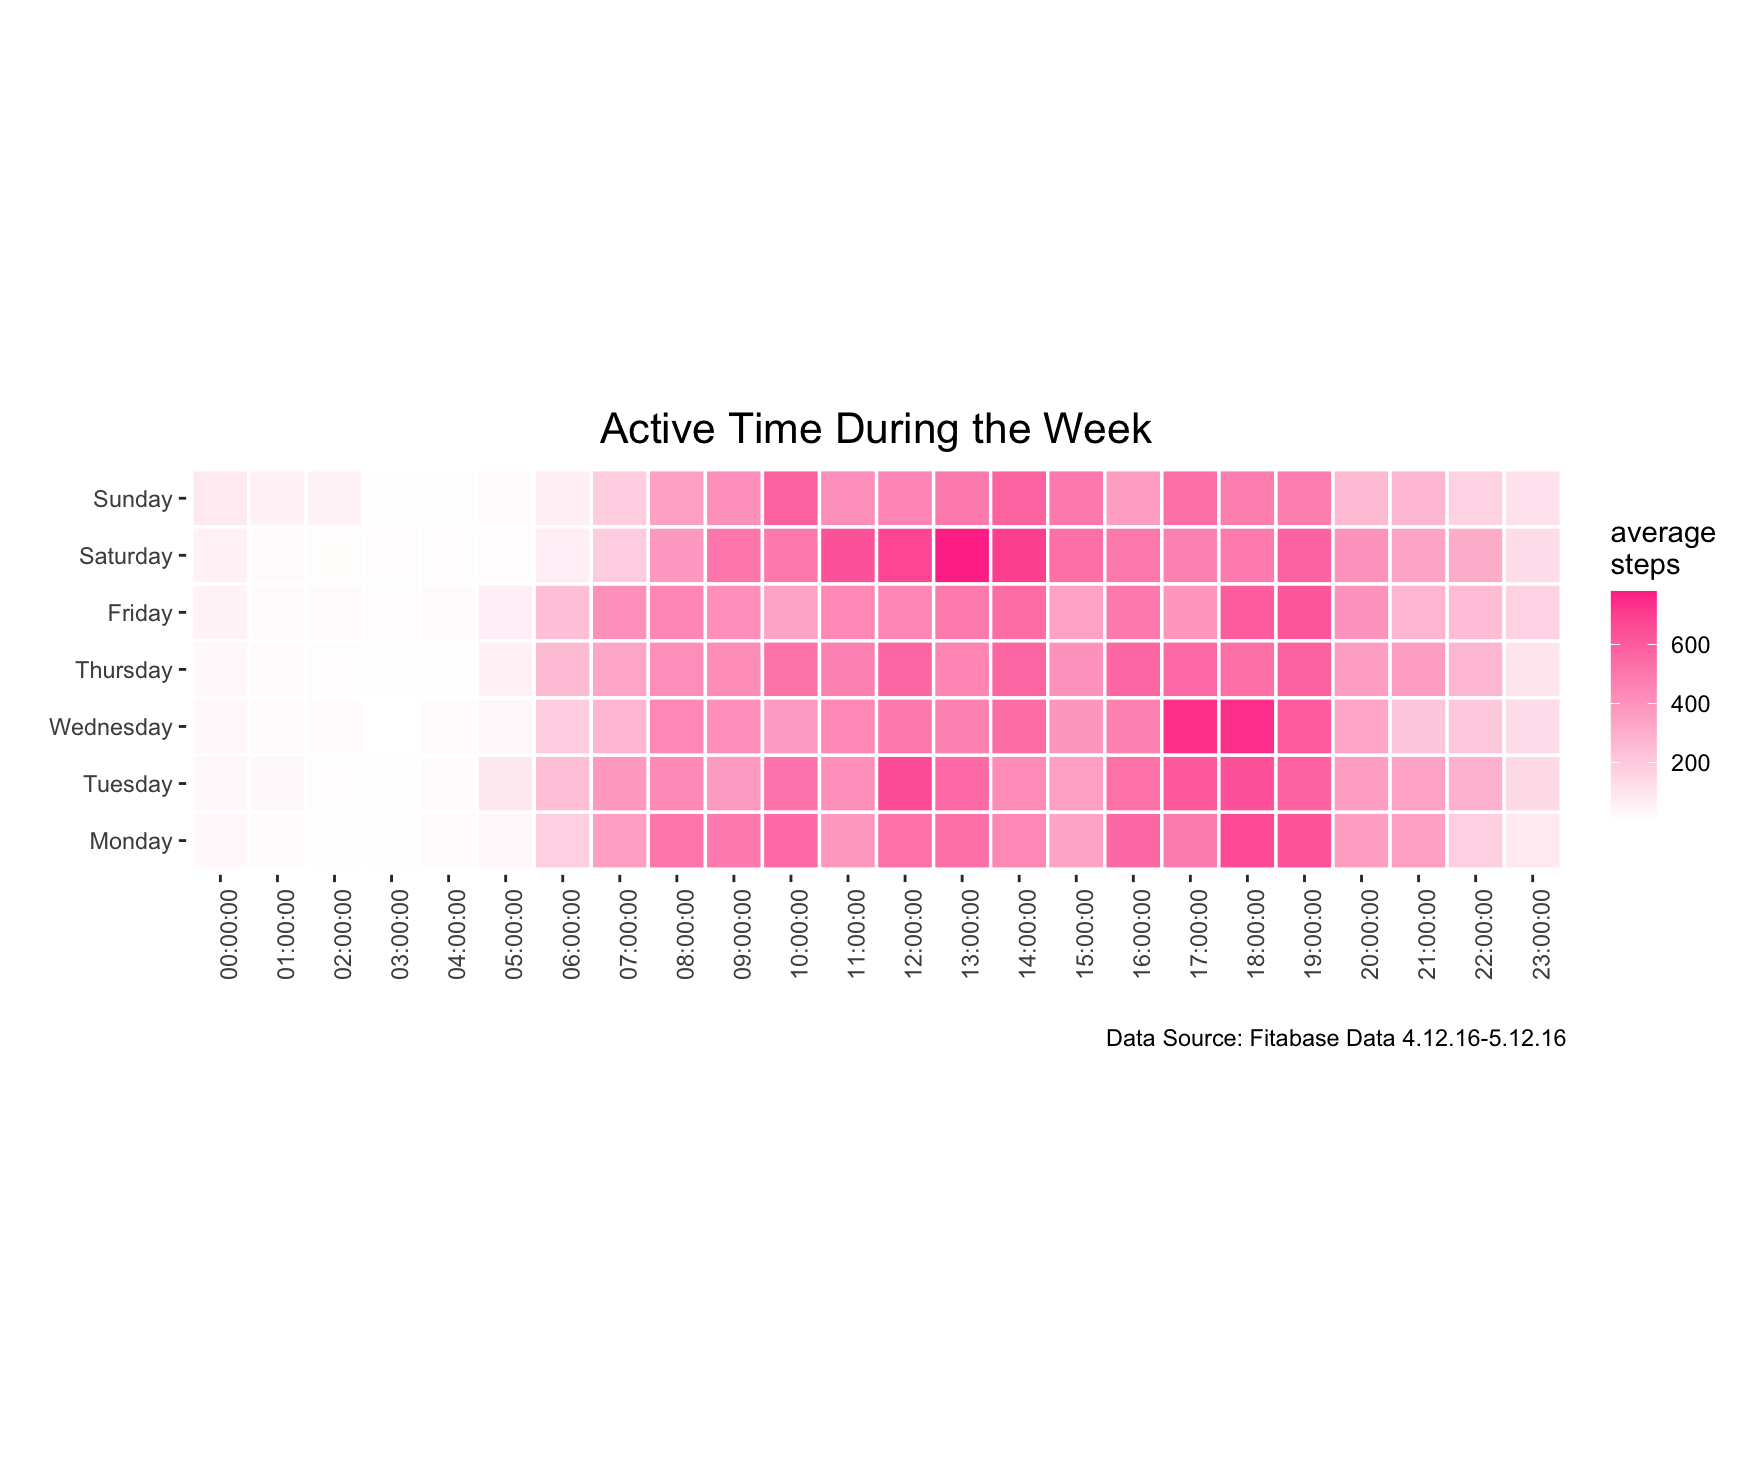

The most active day & times during the week are on Wednesday 5-7pm and Saturday at 1pm. Users are on average most active in the middle of the workweek after week on Wednesday & on their day off on Saturday where they are active in the early afternoon.


<a id="6"></a> <br>
# 6. Act

The user is most active during their lunchbreak from 12-2pm & after work from 5-7pm. They are less active from 10pm-7am where they have to sleep and rest for the next day of work. Overall, the most active day & times are on Wednesday from 5-6pm, and on Saturday from 1-2pm. 

The demogrpahics are women who work an office job, where they are mostly seated, during the week, with the weekdays off. 


**Suggestions**:

The app could have a daily tracker goal tracking the user's time progress, where it can also have daily wellness tips, women's health, & mini trivias where it can give the user a sense of motivation like a game increasing the retention rate. 

Congratuating users with messages based on their progress & milestone for reaching their target can also help with retention and helping the user feel more rewarded about their personal effects.

Another feature the app can include is the user's heartrate to see how their heartrate correlates with their lifestyle, sleep & daily steps.


This is my first project. If you comment if you have any feedback on my project. If this help and you enjoyed this, please give this an upvote. I'd appreciate it!

**Thank you!**